<img style="float: right;" src="./img/es2_logo_tiny.jpg"></img>

# 04-Introduction to the Web Coverage Processing Service (WCPS)

<a href="./03-WCS_in_qgis.ipynb"><< 03-WCS in QGIS</a>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space>&nbsp;<space> <a href="./05-xWCPS_intro.ipynb">05-Introduction to xWCPS>></a>

This tutorial is a practical introduction into the Web Coverage Processing Service.  
Examples include:
- [Basic WCPS request](#basic_wcps)
- [Mathematical operations with WCPS](#maths_wcps)
- [On-the-fly color-scheme application with WCPS](#colouring_wcps)
- [WCPS examples for EO users](#eo_users)
- [WCPS examples from PlanetServer](#planetary_users)
- [WCPS examples for Marine Science Data](#marine_users)
    

***

## Web Coverage Processing Service (WCPS) requests

The [previous tutorial](./02-WCS_core_requests.ipynb) explained the principal setup of WCS requests. A Web Coverage Processing Service (WCPS) is an extension of the WCS core suite. A WCPS has the same setup as a WCS and consists of three components:
* Service endpoint,
* request type and
* query parameter.


 
> **Service endpoint with service description** remained unchanged:  
<font color="blue">http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1</font>

> **Request type:**  
The processing extension defines an additonal request type:
- [<font color="blue">ProcessCoverages</font>](#wcps_examples)

> **Query parameter:**  
Based on a text-based *SQL-like* query language, data can be accessed, modified and retrieved.   
The principal setup of a query is:  


   >> <font color="blue">&query=for c in (</font><font color="green"><i><b>coverageId</b></i></font><font color="blue">) return encode (c</font><font color="orange"><i><b>[...]</b></i></font><font color="blue">, "</font><font color="purple"><i><b>format</b></i></font><font color="blue">")</font>,</p>

>with:
* <font color="green"><i><b>coverageId: </b></i></font> <font>  specifies the parameter (coverage) the query shall be applied on.  
     
     
     >> Example: <font color="green"><i><b>temp2m</b></i></font> for ERA-interim 2m air temperature
     
     
     > * <font color="orange"><i><b>[...]</b></i></font>:    specifies the data or subset of data to work with. You can subset any axis of the coverage.


     >> Example: the coverage temp2m has three axes: Lat, Long, ansi, and subsets of all three axes can be defined as: <font color="orange"><i><b>[Lat(-10.0:10.0), Long(-10.0:10.0), ansi("1999-01-01T00:00":"1999-01-31T18:00")]</b></i></font>.  


> * <font color="purple"><i><b>format</b></i></font>: the implied output format can be specified here.


     >> Possible format encodings are:
* <font color="purple"><b>csv</b></font>
* <font color="purple"><b>netcdf</b></font> or
* <font color="purple"><b>png</b></font>  


***

## <a id='basic_wcps'></a><font color="black">Basic WCPS requests</font>

The following examples show a variety of WCPS queries and mathematical operations that can be applied to the data of a WCS Server. Examples base on ERA-interim 2m air temperature global fields, 6-hourly values from 1 January 1979 to 31 December 2015

* Retrieve **2m air temperature in Kelvin for Europe for January 1999** encoded as **csv**   

<p><font color="blue"><a href='http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (temp2m) return encode(c[Lat(-35.0:65.0), Long(-35.0:80.0),ansi("1999-01-01T00:00":"1999-01-31T18:00")],"csv")' target="_blank"> http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (temp2m) return encode(c[Lat(-35.0:65), Long(35.0:80.0),ansi("1999-01-01T00:00":"1999-01-31T18:00")],"csv")</a></font></p>

In [6]:
import urllib2
url = "http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for%20c%20in%20(temp2m)%20return%20encode(c[Lat(-35.0:65.0),%20Long(-35.0:80.0),ansi(%221999-01-01T00:00%22:%221999-01-31T18:00%22)],%22csv%22)"
response = urllib2.urlopen(url)
html=response.read()
#print html

***

* Retrieve **2m air temperature in Kelvin for Europe for 10 January 1999 at 12 UTC** encoded as **netCDF**  

<p><font color="blue"><a href='http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (temp2m) return encode(c[Lat(-35.0:65.0), Long(-35.0:80.0),ansi("1999-01-12T12:00")],"netcdf")' target="_blank"> http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (temp2m) return encode(c[Lat(-35.0:65.0), Long(35.0:80.0),ansi("1999-01-12T12:00")],"netcdf")</a></font></p>

In [38]:
%%html
<iframe width="1000" height="100" src="http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for%20c%20in%20(temp2m)%20return%20encode(c[Lat(-35.0:65.0),%20Long(-35.0:80.0),ansi(%221999-01-12T12:00%22)],%22netcdf%22)"
></iframe>

  
**Note**: Both queries above do not require WCPS per se. Same data can be rerieved with WCS core requests.

***

## <a id='maths_wcps'></a><font color="black">Conduct mathematical operations with WCPS</font>

Get the **minimum, maximum and mean temperature in degree celsius** of Berlin for the year 2003

There are already predefined <font color="purple"><b>operators</b></font> for retrieving the minimum, maximum and mean: min(), max() and avg(). We additionally convert the 2m air temperature in K into degC via a <font color="green"><b>simple subtraction</b></font>.

* **Minimum**  

>for c in (temp2m) return encode (<font color="purple"><b>min (</b></font> c[Lat(52), Long(13),ansi("2003-01-01T00:00":"2003-12-31T18:00")] <font color="purple"><b>)</b></font><font color="green"> <b>- 273.15</b></font>,"csv")
<p><a href='http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (temp2m) return encode( min(c[Lat(52), Long(13),ansi("2003-01-01T00:00":"2003-12-31T18:00")]) - 273.15,"csv")' target="_blank"> http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (temp2m) return encode(min (c[Lat(52), Long(13),ansi("2003-01-01T00:00":"2003-12-31T18:00")]) - 273.15,"csv")</a></p>

In [15]:
url = "http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for%20c%20in%20(temp2m)%20return%20encode(%20min(c[Lat(52),%20Long(13),ansi(%222003-01-01T00:00%22:%222003-12-31T18:00%22)])%20-%20273.15,%22csv%22)"
response = urllib2.urlopen(url)
html = response.read()
print html

{-15.9804}


***

* **Maximum**
   
>for c in (temp2m) return encode (<font color="purple"><b>max (</b></font> c[Lat(52), Long(13),ansi("2003-01-01T00:00":"2003-12-31T18:00")] <font color="purple"><b>)</b></font><font color="green"><b>- 273.15</b></font>,"csv")
<p><a href='http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (temp2m) return encode( max(c[Lat(52), Long(13),ansi("2003-01-01T00:00":"2003-12-31T18:00")]) - 273.15,"csv")' target="_blank"> http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (temp2m) return encode(max (c[Lat(52), Long(13),ansi("2003-01-01T00:00":"2003-12-31T18:00")]) - 273.15,"csv")</a></p>

In [12]:
url = "http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for%20c%20in%20(temp2m)%20return%20encode(%20max(c[Lat(52),%20Long(13),ansi(%222003-01-01T00:00%22:%222003-12-31T18:00%22)])%20-%20273.15,%22csv%22)"
response = urllib2.urlopen(url)
html=response.read()
print html

{34.4956}


***

* **Average**
   
>for c in (temp2m) return encode (<font color="purple"><b>avg (</b></font> c[Lat(52), Long(13),ansi("2003-01-01T00:00":"2003-12-31T18:00")] <font color="purple"><b>)</b></font><font color="green"> <b>- 273.15</b></font>,"csv")
<p><a href='http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (temp2m) return encode( avg(c[Lat(52), Long(13),ansi("2003-01-01T00:00":"2003-12-31T18:00")]) - 273.15,"csv")' target="_blank"> http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (temp2m) return encode(avg (c[Lat(52), Long(13),ansi("2003-01-01T00:00":"2003-12-31T18:00")]) - 273.15,"csv")</a></p>


In [14]:
url = "http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for%20c%20in%20(temp2m)%20return%20encode(%20avg(c[Lat(52),%20Long(13),ansi(%222003-01-01T00:00%22:%222003-12-31T18:00%22)])%20-%20273.15,%22csv%22)"
response = urllib2.urlopen(url)
html = response.read()
print html

{10.0596}




With three simple queries, we retrieve the minimum, mamximum and average 2m air temperature of Berlin for the year 2003, which are -16 degC, 35.5 degC and 10.1 degC respectively.


***

## <a id='colouring_wcps'></a><font color="black">Apply a colour scheme to a png output</font>

The switch statement allows to classify the png pixel values and to apply RGB colour codes to it. Below, there are two examples how predefined RGB colour codes for 2m air temperature and total precipitation can be applied on-the-fly.

* **Colour scale for 2m air temperature on 18 June 2012 at 12 UTC in degrees Celsius**

> <font color="blue">for c in (temp2m) return encode (  
**switch**  
case -48 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 0; green: 0; blue: 128}  
case -44 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 0; green: 0; blue: 128}  
...   
default return {red: 255; green: 0; blue:0},"png")</font>   
<p><a href='http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (temp2m) return encode ( switch case -48 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 0; green: 0; blue: 128} case -44 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 0; green: 0; blue: 128} case -40 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 0; green: 0; blue: 128} case -36 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 0; green: 0; blue: 128} case -32 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 0; green: 0; blue: 128} case -28 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 0; green: 0; blue: 217} case -24 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 64; green: 0; blue: 255} case -20 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 128; green: 0; blue: 255} case -16 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 0; green: 128; blue: 255} case -12 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 0; green: 255; blue: 255} case -8 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 0; green: 255; blue: 128} case -4 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 128; green: 255; blue: 0} case -0 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 218; green: 255; blue: 0} case 4 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 255; blue: 0} case 8 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 245; blue: 0} case 12 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 218; blue: 0} case 16 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 176; blue: 0} case 20 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 164; blue: 0} case 24 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 79; blue: 0} case 28 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 37; blue: 0} case 32 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 10; blue: 0} case 36 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 0; blue: 0} case 40 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 0; blue: 255} case 44 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 0; blue: 255} case 48 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 0; blue: 255} case 52 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 0; blue: 255} case 56 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 0; blue: 255}  default return {red: 255; green: 0; blue:0},"png")' target="_blank"> http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (temp2m) return encode (switch case -48 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 0; green: 0; blue: 128} case -44 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 0; green: 0; blue: 128} case -40 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 0; green: 0; blue: 128} case -36 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 0; green: 0; blue: 128} case -32 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 0; green: 0; blue: 128} case -28 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 0; green: 0; blue: 217} case -24 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 64; green: 0; blue: 255} case -20 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 128; green: 0; blue: 255} case -16 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 0; green: 128; blue: 255} case -12 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 0; green: 255; blue: 255} case -8 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 0; green: 255; blue: 128} case -4 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 128; green: 255; blue: 0} case -0 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 218; green: 255; blue: 0} case 4 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 255; blue: 0} case 8 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 245; blue: 0} case 12 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 218; blue: 0} case 16 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 176; blue: 0} case 20 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 164; blue: 0} case 24 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 79; blue: 0} case 28 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 37; blue: 0} case 32 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 10; blue: 0} case 36 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 0; blue: 0} case 40 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 0; blue: 255} case 44 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 0; blue: 255} case 48 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 0; blue: 255} case 52 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 0; blue: 255} case 56 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 0; blue: 255}  default return {red: 255; green: 0; blue:0},"png")</a></p>


In [2]:
%%html
<iframe width="1000" height="400" src='http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (temp2m) return encode ( switch case -48 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 0; green: 0; blue: 128} case -44 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 0; green: 0; blue: 128} case -40 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 0; green: 0; blue: 128} case -36 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 0; green: 0; blue: 128} case -32 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 0; green: 0; blue: 128} case -28 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 0; green: 0; blue: 217} case -24 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 64; green: 0; blue: 255} case -20 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 128; green: 0; blue: 255} case -16 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 0; green: 128; blue: 255} case -12 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 0; green: 255; blue: 255} case -8 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 0; green: 255; blue: 128} case -4 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 128; green: 255; blue: 0} case -0 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 218; green: 255; blue: 0} case 4 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 255; blue: 0} case 8 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 245; blue: 0} case 12 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 218; blue: 0} case 16 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 176; blue: 0} case 20 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 164; blue: 0} case 24 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 79; blue: 0} case 28 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 37; blue: 0} case 32 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 10; blue: 0} case 36 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 0; blue: 0} case 40 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 0; blue: 255} case 44 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 0; blue: 255} case 48 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 0; blue: 255} case 52 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 0; blue: 255} case 56 > c[ansi("2012-06-18T12:00")] - 273.5 return {red: 255; green: 0; blue: 255}  default return {red: 255; green: 0; blue:0},"png")'></iframe>

***

* **Total precipitation for 18 June 2016 at 12 UTC in mm of water**  
By specifying alpha parameter of the RGB colour code, one can set specific values to transparent. In the case of total precipitation, all values with less than 0.5 mm of water are set to transparent.

> <font color="blue">for c in (precipitation) return encode (  
**switch**  
case 0.5 > c[ansi("2012-06-18T12:00")] * 1000 return {red: 255; green: 255; blue: 255; alpha: 0}  
case 2 > c[ansi("2012-06-18T12:00")] * 1000 return {red: 0; green: 255; blue: 255; alpha: 255}  
...   
default return {red: 255; green: 0; blue:0; alpha: 255},"png")</font>
<p><a href='http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (precipitation) return encode ( switch case 0.5 > c[ansi("2012-06-18T12:00")] * 1000 return {red: 255; green: 255; blue: 255; alpha: 0} case 2 > c[ansi("2012-06-18T12:00")] * 1000 return {red: 0; green: 255; blue: 255; alpha: 255} case 4 > c[ansi("2012-06-18T12:00")] * 1000 return {red: 0; green: 128; blue: 255; alpha: 255} case 10 > c[ansi("2012-06-18T12:00")] * 1000 return {red: 0; green: 0; blue: 255; alpha: 255} case 25 > c[ansi("2012-06-18T12:00")] * 1000 return {red: 218; green: 0; blue: 255; alpha: 255} case 50 > c[ansi("2012-06-18T12:00")] * 1000 return {red: 255; green: 0; blue: 255; alpha: 255} case 100 > c[ansi("2012-06-18T12:00")] * 1000 return {red: 255; green: 164; blue: 0; alpha: 255} case 250 > c[ansi("2012-06-18T12:00")] * 1000 return {red: 255; green: 0; blue: 0; alpha: 255} case 250 <= c[ansi("2012-06-18T12:00")] * 1000 return {red: 51; green: 51; blue: 51; alpha: 255} default return {red: 255; green: 0; blue:0; alpha: 255},"png")' target="_blank"> http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (precipitation) return encode ( switch case 0.5 > c[ansi("2012-06-18T12:00")] * 1000 return {red: 255; green: 255; blue: 255; alpha: 0} case 2 > c[ansi("2012-06-18T12:00")] * 1000 return {red: 0; green: 255; blue: 255; alpha: 255} case 4 > c[ansi("2012-06-18T12:00")] * 1000 return {red: 0; green: 128; blue: 255; alpha: 255} case 10 > c[ansi("2012-06-18T12:00")] * 1000 return {red: 0; green: 0; blue: 255; alpha: 255} case 25 > c[ansi("2012-06-18T12:00")] * 1000 return {red: 218; green: 0; blue: 255; alpha: 255} case 50 > c[ansi("2012-06-18T12:00")] * 1000 return {red: 255; green: 0; blue: 255; alpha: 255} case 100 > c[ansi("2012-06-18T12:00")] * 1000 return {red: 255; green: 164; blue: 0; alpha: 255} case 250 > c[ansi("2012-06-18T12:00")] * 1000 return {red: 255; green: 0; blue: 0; alpha: 255} case 250 <= c[ansi("2012-06-18T12:00")] * 1000 return {red: 51; green: 51; blue: 51; alpha: 255} default return {red: 255; green: 0; blue:0; alpha: 255},"png")</a></p>

In [37]:
%%html
<iframe width="1000" height="400" src='http://earthserver.ecmwf.int/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for c in (precipitation) return encode ( switch case 0.5 > c[ansi("2012-06-18T12:00")] * 1000 return {red: 255; green: 255; blue: 255; alpha: 0} case 2 > c[ansi("2012-06-18T12:00")] * 1000 return {red: 0; green: 255; blue: 255; alpha: 255} case 4 > c[ansi("2012-06-18T12:00")] * 1000 return {red: 0; green: 128; blue: 255; alpha: 255} case 10 > c[ansi("2012-06-18T12:00")] * 1000 return {red: 0; green: 0; blue: 255; alpha: 255} case 25 > c[ansi("2012-06-18T12:00")] * 1000 return {red: 218; green: 0; blue: 255; alpha: 255} case 50 > c[ansi("2012-06-18T12:00")] * 1000 return {red: 255; green: 0; blue: 255; alpha: 255} case 100 > c[ansi("2012-06-18T12:00")] * 1000 return {red: 255; green: 164; blue: 0; alpha: 255} case 250 > c[ansi("2012-06-18T12:00")] * 1000 return {red: 255; green: 0; blue: 0; alpha: 255} case 250 <= c[ansi("2012-06-18T12:00")] * 1000 return {red: 51; green: 51; blue: 51; alpha: 255} default return {red: 255; green: 0; blue:0; alpha: 255},"png")'></iframe>

***

## <a id='eo_users'></a><font color="black">WCPS examples for EO users</font>

### Calculate a NDVI from a Landsat8 image

The query below calculated on the fly the Normalized-Difference-Vegetation-Index (NDVI) from a Landsat8 satellite image for UTM Zone 31. Landsat 8 provides 11 bands and the NDVI is produced using the bands 4 (red) and 5 (near-infrared).

> <font color="blue">for r in (L8_B6_32631_30), g in (L8_B5_32631_30), b in (L8_B4_32631_30)
return 
encode ( {
red:   ( (r * 0.00002) - 0.1 ) * 255;
green: ( (g * 0.00002) - 0.1 ) * 255;
blue:  ( (b * 0.00002) - 0.1 ) * 255
}
[E(377983:390000),N(4902991:4917275),unix(1433068497)]
,"png")</font>

In [36]:
%%html
<iframe width="1000" height="400" src='http://eodataservice.org/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for%20R%20in%20(L8_B4_32631_30),%20NIR%20in%20(L8_B5_32631_30)%20return%20encode(%20(%20(%20(%20255*((NIR*0.00002)%20-%200.1%20)%20-%20(%20(R*0.00002)%20-%200.1%20)%20)%20/%20(%20((NIR*0.00002)%20-%200.1%20)%20+%20(%20(R*0.00002)%20-%200.1%20)%20)%20)%20[E(377983:390000),N(4902991:4917275),unix(1433068497)]%20)%20,%20%22png%22) '></iframe>

### Generate a RGB image and apply a mask on-the-fly

Following query generates on-the-fly a RGB image from a Landsat 8 satellite image and at the same applies a a mask based on the BQA (band-quality-assessment) band from the Landsat8 satellite. Each pixel with a value smaller than the band-quality value "24576" is considered as valid, all others are masked. 

> <font color="blue">for r in (L8_B6_32631_30), g in (L8_B5_32631_30), b in (L8_B4_32631_30), bq in (L8_BQA_32631_30)
return
encode ( {
red:   ( (r*(bq < 24576) * 0.00002) - 0.1 ) * 255;
green: ( (g*(bq < 24576) * 0.00002) - 0.1 ) * 255;
blue:  ( (b*(bq < 24576) * 0.00002) - 0.1 ) * 255
}
[E(377983:390000),N(4902991:4917275),unix(1433068497)]
,"png")</font>

In [35]:
%%html
<iframe width="1000" height="400" src='http://eodataservice.org/rasdaman/ows?query=%0Afor%20r%20in%20%28L8_B6_32631_30%29%2C%20g%20in%20%28L8_B5_32631_30%29%2C%20b%20in%20%28L8_B4_32631_30%29%2C%20bq%20in%20%28L8_BQA_32631_30%29%0Areturn%20%0Aencode%20%28%20{%0Ared%3A%20%20%20%28%20%28r*%28bq%20%3C%2024576%29%20*%200.00002%29%20-%200.1%20%29%20*%20255%3B%0Agreen%3A%20%28%20%28g*%28bq%20%3C%2024576%29%20*%200.00002%29%20-%200.1%20%29%20*%20255%3B%0Ablue%3A%20%20%28%20%28b*%28bq%20%3C%2024576%29%20*%200.00002%29%20-%200.1%20%29%20*%20255%0A}%0A[E%28377983%3A390000%29%2CN%284902991%3A4917275%29%2Cunix%281433068497%29]%0A%2C%22png%22%29'></iframe>

***

## <a id='planetary_users'></a><font color="black">WCPS examples from PlanetServer</font>

### Data description

The **Compact Reconnaissance Imaging Spectrometer for Mars (CRISM)** is a visible and infrared spectrometer on board of the **Mars Reconnaissance Orbiter (MRO)**. The main purpose of CRISM is to characterize the mineralogy of Mars that may have hosted water. CRISM contains two spectrographs, one with a range of 400 to 830 nm (visible light) and one that ranges from 830 to 4050 nm (infrared light).

In order to detect the minerals the normal procedure is to produce images using band math to highlight certain materials that have a particular spectral signal. Once the mineral has been detected, one should analyze the whole spectra at those locations pixel-wise or with a kernel.

### Retrieve a false color composite

> <font color="blue">for data in (frt0000805f_07_if166l_trr3) return encode({  
red: (int)(255 / (max((data.band_233 != 65535) * data.band_233) - min(data.band_233))) * (data.band_233 - min(data.band_233));   
green: (int)(255 / (max((data.band_13 != 65535) * data.band_13) - min(data.band_13))) * (data.band_13 - min(data.band_13));   
blue: (int)(255 / (max((data.band_78 != 65535) * data.band_78) - min(data.band_78))) * (data.band_78 - min(data.band_78));   
alpha: (data.band_100 != 65535) * 255},   
"png", "nodata=null")</font>
<p><a href="http://access.planetserver.eu:8080/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for%20data%20in%20(frt0000abcb_07_if166l_trr3)%20return%20encode(%20{%20red:%20(int)(255%20/%20(max((data.band_233%20!=%2065535)%20*%20data.band_233)%20-%20min(data.band_233)))%20*%20(data.band_233%20-%20min(data.band_233));%20green:%20(int)(255%20/%20(max((data.band_13%20!=%2065535)%20*%20data.band_13)%20-%20min(data.band_13)))%20*%20(data.band_13%20-%20min(data.band_13));%20blue:%20(int)(255%20/%20(max((data.band_78%20!=%2065535)%20*%20data.band_78)%20-%20min(data.band_78)))%20*%20(data.band_78%20-%20min(data.band_78))%20;%20alpha:%20(data.band_100%20!=%2065535)%20*%20255},%20%22png%22,%20%22nodata=null%22)" target="_blank"> http://access.planetserver.eu:8080/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=
for data in (frt0000805f_07_if166l_trr3) return encode({red: (int)(255 / (max((data.band_233 != 65535) * data.band_233) - min(data.band_233))) * (data.band_233 - min(data.band_233));green: (int)(255 / (max((data.band_13 != 65535) * data.band_13) - min(data.band_13))) * (data.band_13 - min(data.band_13)); blue: (int)(255 / (max((data.band_78 != 65535) * data.band_78) - min(data.band_78))) * (data.band_78 - min(data.band_78)); alpha: (data.band_100 != 65535) * 255},"png", "nodata=null")</a></p>

In [34]:
%%html
<iframe width="1000" height="400" src='http://access.planetserver.eu:8080/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for%20data%20in%20(frt0000abcb_07_if166l_trr3)%20return%20encode(%20{%20red:%20(int)(255%20/%20(max((data.band_233%20!=%2065535)%20*%20data.band_233)%20-%20min(data.band_233)))%20*%20(data.band_233%20-%20min(data.band_233));%20green:%20(int)(255%20/%20(max((data.band_13%20!=%2065535)%20*%20data.band_13)%20-%20min(data.band_13)))%20*%20(data.band_13%20-%20min(data.band_13));%20blue:%20(int)(255%20/%20(max((data.band_78%20!=%2065535)%20*%20data.band_78)%20-%20min(data.band_78)))%20*%20(data.band_78%20-%20min(data.band_78))%20;%20alpha:%20(data.band_100%20!=%2065535)%20*%20255},%20%22png%22,%20%22nodata=null%22)'></iframe>

### RGB combination with a customised WCPS query

The query is used to look for phyllosilicates with Aluminium content. It is translated from the products created by Vivano-beck found in [1](http://onlinelibrary.wiley.com/doi/10.1002/2014JE004627/abstract). The following query is a WCPS query with a WCPS query in each channel.

> <font color="blue">for data in ( frt00009971_07_if166l_trr3 ) return encode( {  
<font color='red'>**red**</font>:(int)( 255 / ( max((1 - (data.band_185 / ((1 - (0.538461538)) * data.band_178   (0.538461538) * data.band_191)))) - min((1 - (data.band_185 / ((1 - (0.538461538)) * data.band_178   (0.538461538) * data.band_191)))) )) * ( ((1 - (data.band_185 / ((1 - (0.538461538)) * data.band_178   (0.538461538) * data.band_191)))) - min((1 - (data.band_185 / ((1 - (0.538461538)) * data.band_178   (0.538461538) * data.band_191)))) );  
<font color='green'>**green**</font>:(int)( 255 / ( max((1 - (data.band_181 / ((1 - (0.49988651)) * data.band_171   (0.49988651) * data.band_191)))) - min((1 - (data.band_181 / ((1 - (0.49988651)) * data.band_171   (0.49988651) * data.band_191)))) )) * ( ((1 - (data.band_181 / ((1 - (0.49988651)) * data.band_171   (0.49988651) * data.band_191)))) - min((1 - (data.band_181 / ((1 - (0.49988651)) * data.band_171   (0.49988651) * data.band_191)))) );  
<font color='blue'>**blue**</font>:(int)( 255 / ( max((1 - (data.band_178 / ((1 - (0.374881786)) * data.band_171   (0.374881786) * data.band_188)))) - min((1 - (data.band_178 / ((1 - (0.374881786)) * data.band_171   (0.374881786) * data.band_188)))) )) * ( ((1 - (data.band_178 / ((1 - (0.374881786)) * data.band_171   (0.374881786) * data.band_188)))) - min((1 - (data.band_178 / ((1 - (0.374881786)) * data.band_171   (0.374881786) * data.band_188)))) );  
alpha: (data.band_100 != 65535) * 255 }, "tiff", "nodata=null")</font>

In [33]:
%%html
<iframe width="1000" height="400" src='http://access.planetserver.eu:8090/python?wcpsQuery=http://access.planetserver.eu:8080/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for%20data%20in%20(%20frt0000abcb_07_if166l_trr3%20)%20return%20encode(%20{Red:(int)(%20255%20/%20(%20max((1%20-%20(data.band_185%20/%20((1%20-%20(0.538461538))%20*%20data.band_178%20+%20(0.538461538)%20*%20data.band_191))))%20-%20min((1%20-%20(data.band_185%20/%20((1%20-%20(0.538461538))%20*%20data.band_178%20+%20(0.538461538)%20*%20data.band_191))))%20))%20*%20(%20((1%20-%20(data.band_185%20/%20((1%20-%20(0.538461538))%20*%20data.band_178%20+%20(0.538461538)%20*%20data.band_191))))%20-%20min((1%20-%20(data.band_185%20/%20((1%20-%20(0.538461538))%20*%20data.band_178%20+%20(0.538461538)%20*%20data.band_191))))%20);%20Green:(int)(%20255%20/%20(%20max((1%20-%20(data.band_181%20/%20((1%20-%20(0.49988651))%20*%20data.band_171%20+%20(0.49988651)%20*%20data.band_191))))%20-%20min((1%20-%20(data.band_181%20/%20((1%20-%20(0.49988651))%20*%20data.band_171%20+%20(0.49988651)%20*%20data.band_191))))%20))%20*%20(%20((1%20-%20(data.band_181%20/%20((1%20-%20(0.49988651))%20*%20data.band_171%20+%20(0.49988651)%20*%20data.band_191))))%20-%20min((1%20-%20(data.band_181%20/%20((1%20-%20(0.49988651))%20*%20data.band_171%20+%20(0.49988651)%20*%20data.band_191))))%20);%20Blue:(int)(%20255%20/%20(%20max((1%20-%20(data.band_178%20/%20((1%20-%20(0.374881786))%20*%20data.band_171%20+%20(0.374881786)%20*%20data.band_188))))%20-%20min((1%20-%20(data.band_178%20/%20((1%20-%20(0.374881786))%20*%20data.band_171%20+%20(0.374881786)%20*%20data.band_188))))%20))%20*%20(%20((1%20-%20(data.band_178%20/%20((1%20-%20(0.374881786))%20*%20data.band_171%20+%20(0.374881786)%20*%20data.band_188))))%20-%20min((1%20-%20(data.band_178%20/%20((1%20-%20(0.374881786))%20*%20data.band_171%20+%20(0.374881786)%20*%20data.band_188))))%20);%20%20alpha:%20(data.band_100%20!=%2065535)%20*%20255%20},%20%22tiff%22,%20%22nodata=null%22)'></iframe>

### Single pixel query

Single pixel spectral analysis is pursued by querying all the channels of one of the observations for one pixel and compare the signal's absorption bands with a laboratory sample. While this will give us a first idea of possible materials, the established procedure consists on creating a kernel and average the signal. This allows us to avoid possible sub-pixel errors since normally materials are mixed in different concentrations with other materials.  

In this example we show a single pixel query. The description of the variables is as follows:

* <b>x_axis</b>: We use a fixed X axis in order to avoid possible rounding errors if this is created with a function.
* <b>data</b>: It will contain the spectral signal stored as a numpy array which has been queried to the data endpoint. Note that the data has to be cleaned from null_values and nan.

> <font color="blue">for c in (frt000050f2_07_if165l_trr3) return encode(c[N(893017.359289:893017.359289),E(4278699.1105:4278699.1105)],"csv")</font>
<p><a href="http://access.planetserver.eu:8080/rasdaman/ows?query=for%20c%20in%20(frt000050f2_07_if165l_trr3)%20return%20encode(c[%20N(893017.359289:893017.359289),%20E(4278699.1105:4278699.1105)%20],%20%22csv%22)'" target="_blank"> http://access.planetserver.eu:8080/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=
for c in (frt000050f2_07_if165l_trr3) return encode(c[N(893017.359289:893017.359289),E(4278699.1105:4278699.1105)],"csv")</a></p>

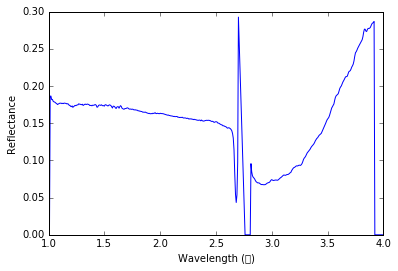

In [18]:
%matplotlib inline
import math
import numpy as np 
import matplotlib.pyplot as plt 


x_axis = [1.00135, 1.0079, 1.0144500000000001, 1.0209999999999999, 1.02755, 1.0341, 1.0406500000000001, 1.0471999999999999, 1.05375, 1.0603, 1.0668500000000001, 1.07341, 1.07996, 1.0865100000000001, 1.09307, 1.09962, 1.1061700000000001, 1.11273, 1.1192800000000001, 1.12584, 1.13239, 1.1389499999999999, 1.14551, 1.1520600000000001, 1.15862, 1.1651800000000001, 1.1717299999999999, 1.1782900000000001, 1.18485, 1.1914100000000001, 1.19797, 1.2045300000000001, 1.21109, 1.2176499999999999, 1.22421, 1.2307699999999999, 1.23733, 1.2438899999999999, 1.2504500000000001, 1.25701, 1.2635700000000001, 1.27014, 1.2766999999999999, 1.2832600000000001, 1.28983, 1.2963899999999999, 1.3029500000000001, 1.30952, 1.3160799999999999, 1.3226500000000001, 1.32921, 1.33578, 1.3423400000000001, 1.3489100000000001, 1.35548, 1.36205, 1.3686100000000001, 1.3751800000000001, 1.38175, 1.38832, 1.39489, 1.4014500000000001, 1.40802, 1.41459, 1.42116, 1.4277299999999999, 1.43431, 1.4408799999999999, 1.4474499999999999, 1.4540200000000001, 1.4605900000000001, 1.46716, 1.47374, 1.48031, 1.48688, 1.49346, 1.50003, 1.50661, 1.51318, 1.51976, 1.52633, 1.53291, 1.53948, 1.54606, 1.55264, 1.55921, 1.56579, 1.57237, 1.5789500000000001, 1.58552, 1.5921000000000001, 1.5986800000000001, 1.6052599999999999, 1.6118399999999999, 1.61842, 1.625, 1.63158, 1.6381600000000001, 1.6447400000000001, 1.65133, 1.65791, 1.66449, 1.6710700000000001, 1.6776599999999999, 1.68424, 1.69082, 1.6974100000000001, 1.7039899999999999, 1.71058, 1.71716, 1.7237499999999999, 1.7303299999999999, 1.73692, 1.7435099999999999, 1.7500899999999999, 1.75668, 1.7632699999999999, 1.7698499999999999, 1.77644, 1.7830299999999999, 1.78962, 1.7962100000000001, 1.8028, 1.8093900000000001, 1.8159799999999999, 1.82257, 1.8291599999999999, 1.83575, 1.8423400000000001, 1.84893, 1.8555200000000001, 1.86212, 1.8687100000000001, 1.8753, 1.8818999999999999, 1.88849, 1.8950800000000001, 1.90168, 1.9082699999999999, 1.9148700000000001, 1.9214599999999999, 1.9280600000000001, 1.93465, 1.9412499999999999, 1.9478500000000001, 1.95444, 1.9610399999999999, 1.9676400000000001, 1.97424, 1.9808399999999999, 1.98743, 1.99403, 2.0006300000000001, 2.0072299999999998, 2.01383, 2.0204300000000002, 2.0270299999999999, 2.03363, 2.0402399999999998, 2.04684, 2.0534400000000002, 2.0600399999999999, 2.06664, 2.0732499999999998, 2.07985, 2.0864500000000001, 2.0930599999999999, 2.0996600000000001, 2.1062699999999999, 2.11287, 2.1194799999999998, 2.12608, 2.1326900000000002, 2.1393, 2.1459000000000001, 2.1525099999999999, 2.1591200000000002, 2.1657199999999999, 2.1723300000000001, 2.1789399999999999, 2.1855500000000001, 2.1921599999999999, 2.1987700000000001, 2.2053799999999999, 2.2119900000000001, 2.2185999999999999, 2.2252100000000001, 2.2318199999999999, 2.2384300000000001, 2.2450399999999999, 2.2516500000000002, 2.25827, 2.2648799999999998, 2.27149, 2.2780999999999998, 2.2847200000000001, 2.2913299999999999, 2.2979500000000002, 2.3045599999999999, 2.3111799999999998, 2.31779, 2.3244099999999999, 2.3310200000000001, 2.3376399999999999, 2.3442599999999998, 2.35087, 2.3574899999999999, 2.3641100000000002, 2.3707199999999999, 2.3773399999999998, 2.3839600000000001, 2.3905799999999999, 2.3972000000000002, 2.4038200000000001, 2.4104399999999999, 2.4170600000000002, 2.4236800000000001, 2.4302999999999999, 2.4369200000000002, 2.44354, 2.45017, 2.4567899999999998, 2.4634100000000001, 2.4700299999999999, 2.4766599999999999, 2.4832800000000002, 2.4899, 2.4965299999999999, 2.50312, 2.5097200000000002, 2.5163199999999999, 2.5229200000000001, 2.5295100000000001, 2.5361099999999999, 2.54271, 2.5493100000000002, 2.5559099999999999, 2.5625100000000001, 2.5691099999999998, 2.5757099999999999, 2.5823100000000001, 2.5889099999999998, 2.59551, 2.6021200000000002, 2.6087199999999999, 2.6153200000000001, 2.6219199999999998, 2.62853, 2.6351300000000002, 2.64174, 2.6483400000000001, 2.6549499999999999, 2.6615500000000001, 2.6681599999999999, 2.67476, 2.6813699999999998, 2.68798, 2.6945800000000002, 2.70119, 2.7606799999999998, 2.76729, 2.7738999999999998, 2.7805200000000001, 2.7871299999999999, 2.7937400000000001, 2.8003499999999999, 2.8069700000000002, 2.81358, 2.8201999999999998, 2.82681, 2.8334299999999999, 2.8400400000000001, 2.84666, 2.8532799999999998, 2.85989, 2.8665099999999999, 2.8731300000000002, 2.87975, 2.8863599999999998, 2.8929800000000001, 2.8996, 2.9062199999999998, 2.9128400000000001, 2.9194599999999999, 2.9260799999999998, 2.9327000000000001, 2.9393199999999999, 2.9459499999999998, 2.9525700000000001, 2.95919, 2.9658099999999998, 2.9724400000000002, 2.97906, 2.9856799999999999, 2.9923099999999998, 2.9989300000000001, 3.00556, 3.0121799999999999, 3.0188100000000002, 3.0254400000000001, 3.03206, 3.0386899999999999, 3.0453199999999998, 3.0519500000000002, 3.05857, 3.0651999999999999, 3.0718299999999998, 3.0784600000000002, 3.0850900000000001, 3.09172, 3.0983499999999999, 3.1049799999999999, 3.1116100000000002, 3.1182500000000002, 3.1248800000000001, 3.13151, 3.1381399999999999, 3.1447799999999999, 3.1514099999999998, 3.1580400000000002, 3.1646800000000002, 3.1713100000000001, 3.1779500000000001, 3.18458, 3.1912199999999999, 3.1978499999999999, 3.2044899999999998, 3.2111299999999998, 3.2177600000000002, 3.2244000000000002, 3.2310400000000001, 3.2376800000000001, 3.2443200000000001, 3.2509600000000001, 3.2576000000000001, 3.26424, 3.27088, 3.27752, 3.28416, 3.2907999999999999, 3.2974399999999999, 3.3040799999999999, 3.31073, 3.3173699999999999, 3.3240099999999999, 3.33066, 3.3372999999999999, 3.34395, 3.35059, 3.35724, 3.36388, 3.37053, 3.37717, 3.3838200000000001, 3.3904700000000001, 3.3971200000000001, 3.4037600000000001, 3.4104100000000002, 3.4170600000000002, 3.4237099999999998, 3.4303599999999999, 3.4370099999999999, 3.4436599999999999, 3.45031, 3.45696, 3.4636100000000001, 3.4702600000000001, 3.4769199999999998, 3.4835699999999998, 3.4902199999999999, 3.4968699999999999, 3.50353, 3.5101800000000001, 3.5168400000000002, 3.5234899999999998, 3.5301499999999999, 3.5367999999999999, 3.5434600000000001, 3.5501100000000001, 3.5567700000000002, 3.5634299999999999, 3.5700799999999999, 3.57674, 3.5834000000000001, 3.5900599999999998, 3.5967199999999999, 3.60338, 3.6100400000000001, 3.6166999999999998, 3.6233599999999999, 3.63002, 3.6366800000000001, 3.6433399999999998, 3.6499999999999999, 3.6566700000000001, 3.6633300000000002, 3.6699899999999999, 3.67665, 3.6833200000000001, 3.6899799999999998, 3.69665, 3.7033100000000001, 3.7099799999999998, 3.7166399999999999, 3.7233100000000001, 3.7299799999999999, 3.73664, 3.7433100000000001, 3.7499799999999999, 3.75665, 3.7633100000000002, 3.7699799999999999, 3.7766500000000001, 3.7833199999999998, 3.78999, 3.7966600000000001, 3.8033299999999999, 3.8100000000000001, 3.8166699999999998, 3.82335, 3.8300200000000002, 3.8366899999999999, 3.8433600000000001, 3.8500399999999999, 3.8567100000000001, 3.8633899999999999, 3.8700600000000001, 3.8767299999999998, 3.88341, 3.8900800000000002, 3.89676, 3.9034399999999998, 3.91011, 3.9167900000000002, 3.92347, 3.9301499999999998, 3.93682, 4.0]

#query = "http://access.planetserver.eu:8080/rasdaman/ows?query=for%20c%20in%20(frt000050f2_07_if165l_trr3)%20return%20encode(c[%20N(893017.359289:893017.359289),%20E(4278699.1105:4278699.1105)%20],%20%22csv%22)"

data_single = np.genfromtxt('http://access.planetserver.eu:8080/rasdaman/ows?query=for%20c%20in%20(frt000050f2_07_if165l_trr3)%20return%20encode(c[%20N(893017.359289:893017.359289),%20E(4278699.1105:4278699.1105)%20],%20%22csv%22)',delimiter=' ', dtype = float)

for x in range (0,len(data_single)):
    if data_single[x] == 65535 or math.isnan(data_single[x]):
        data_single[x] = 0 
        

plt.xlabel( 'Wavelength (' + u"\u03BC" + ')')
plt.ylabel( 'Reflectance' )
plt.plot(x_axis,data_single)
plt.show()

***

## <a id='marine_users'></a><font color="black">WCPS examples for Marine Science Data</font>

### Apply a colour scheme to a png output

> <font color="blue">for a in (CCI_V2_monthly_chlor_a) return encode(  
<b>switch</b> case 0.05 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 255; green: 255; blue: 255; alpha: 0}   
case 0.1 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 0; green: 255; blue: 255; alpha: 255}   
case 0.2 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 0; green: 128; blue: 255; alpha: 255}   
case 0.5 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 0; green: 0; blue: 255; alpha: 255}   
case 1.5 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 218; green: 0; blue: 255; alpha: 255}   
case 3.0 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 255; green: 0; blue: 255; alpha: 255}   
case 4.5 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 255; green: 164; blue: 0; alpha: 255}   
case 6.2 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 255; green: 250; blue: 0; alpha: 255}   
case 20 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 255; green: 0; blue: 0; alpha: 255}   
default return {red: 255; green: 255; blue:255; alpha: 0} ,"png" )</font>
<p><a href='http://earthserver.pml.ac.uk/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for a in (CCI_V2_monthly_chlor_a) return encode (switch case 0.05 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")] return {red: 255; green: 255; blue: 255; alpha: 0} case 0.1 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 0; green: 255; blue: 255; alpha: 255} case 0.2 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 0; green: 128; blue: 255; alpha: 255} case 0.5 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 0; green: 0; blue: 255; alpha: 255} 
case 1.5 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 218; green: 0; blue: 255; alpha: 255} case 3.0 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 255; green: 0; blue: 255; alpha: 255} case 4.5 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 255; green: 164; blue: 0; alpha: 255} case 6.2 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 255; green: 250; blue: 0; alpha: 255} case 20 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 255; green: 0; blue: 0; alpha: 255} default return {red: 255; green: 255; blue:255; alpha: 0} ,"png")' target="_blank"> http://earthserver.pml.ac.uk/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for a in (CCI_V2_monthly_chlor_a) return encode (switch case 0.05 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")] return {red: 255; green: 255; blue: 255; alpha: 0} case 0.1 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 0; green: 255; blue: 255; alpha: 255} case 0.2 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 0; green: 128; blue: 255; alpha: 255} case 0.5 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 0; green: 0; blue: 255; alpha: 255} 
case 1.5 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 218; green: 0; blue: 255; alpha: 255} case 3.0 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 255; green: 0; blue: 255; alpha: 255} case 4.5 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 255; green: 164; blue: 0; alpha: 255} case 6.2 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 255; green: 250; blue: 0; alpha: 255} case 20 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 255; green: 0; blue: 0; alpha: 255} default return {red: 255; green: 255; blue:255; alpha: 0} ,"png")</a></p>

In [1]:
%%html
<iframe width="1000" height="400" src='http://earthserver.pml.ac.uk/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for a in (CCI_V2_monthly_chlor_a) return encode (switch case 0.05 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")] return {red: 255; green: 255; blue: 255; alpha: 0} case 0.1 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")] return {red: 0; green: 255; blue: 255; alpha: 255} case 0.2 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")] return {red: 0; green: 128; blue: 255; alpha: 255} case 0.5 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")] return {red: 0; green: 0; blue: 255; alpha: 255} case 1.5 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")] return {red: 218; green: 0; blue: 255; alpha: 255} case 3.0 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")] return {red: 255; green: 0; blue: 255; alpha: 255} case 4.5 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")] return {red: 255; green: 164; blue: 0; alpha: 255} case 6.2 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")] return {red: 255; green: 250; blue: 0; alpha: 255} case 20 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")] return {red: 255; green: 0; blue: 0; alpha: 255} default return {red: 255; green: 255; blue:255; alpha: 0} ,"png")'></iframe>

### Retrieve a time-series of daily chlorophyll values averaged over a given bounding box

> <font color="blue">for c in (CCI_V2_release_daily_chlor_a) return encode((float)  
coverage histogram over   
<a style="color:blue;">&#036;</a>px x( 0 : 0 ),   
<a style="color:blue;">&#036;</a>py y( 0 : 0 ),   
<a style="color:blue;">&#036;</a>pt ansi( 0 : 364 )   
values  (    
add( (c[Long(-50:-40), Lat(45:55),ansi:"CRS:1"(<a style="color:blue;">&#036;</a>pt)] < 100000 ) * c[Long(-50:-40), Lat(45:55),ansi:"CRS:1"(<a style="color:blue;">&#036;</a> pt)])  
/  
count(c[Long(-50:-40), Lat(45:55),ansi:"CRS:1"(<a style="color:blue;">&#036;</a>pt)] < 100000)),   
"csv")</font>

In [31]:
url = "http://earthserver.pml.ac.uk/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for%20c%20in%20%28CCI_V2_release_daily_chlor_a%29%20return%20encode%28%28float%29%20coverage%20histogram%20over%20$px%20x%28%200%20:%200%20%29,%20$py%20y%28%200%20:%200%20%29,%20$pt%20ansi%28%200%20:%20364%20%29%20values%20%20%28add%28%20%28c[Long%28-50:-40%29,%20Lat%2845:55%29,ansi:%22CRS:1%22%28$pt%29]%20%3C%20100000%20%29%20*%20c[Long%28-50:-40%29,%20Lat%2845:55%29,ansi:%22CRS:1%22%28$pt%29]%29/count%28c[Long%28-50:-40%29,%20Lat%2845:55%29,ansi:%22CRS:1%22%28$pt%29]%20%3C%20100000%20%29%29,%20%22csv%22%29"
response = urllib2.urlopen(url)
html = response.read()
print html

{{-nan,0.40504,0.289922,0.866868,-nan,-nan,-nan,-nan,-nan,0.406144,0.484246,-nan,-nan,0.329948,0.427015,0.333369,0.344059,-nan,0.481715,0.702768,0.493814,0.591549,0.542506,0.52223,-nan,0.474677,-nan,0.176502,0.441625,0.400584,0.300549,-nan,0.313997,0.154237,0.393646,0.438439,0.337088,-nan,0.373397,-nan,0.506524,-nan,-nan,0.250166,0.337142,-nan,0.533212,0.499041,-nan,-nan,0.307986,-nan,0.280885,0.372581,0.418914,0.250967,0.373655,0.447746,0.339002,-nan,0.34087,0.490016,0.524432,0.524642,0.624468,0.181286,0.229421,0.270063,0.357343,0.314312,0.334431,0.641658,0.420746,0.297135,0.543192,0.515513,0.466969,0.655529,0.230714,0.311842,0.391015,0.922316,0.976092,0.766218,-nan,-nan,0.379899,2.05257,0.590015,0.563777,0.596195,0.742323,0.863842,0.259646,0.567565,0.373728,-nan,0.762872,0.579484,0.773435,0.710847,0.815834,0.875209,0.969883,1.01406,1.06932,0.864076,1.07905,0.888517,1.07344,0.971986,-nan,0.854812,1.03236,0.466316,-nan,0.619292,1.26028,0.539869,0.442413,1.73475,0.842918,1.0583,1.40294,

***

The examples above shall give you an idea of what data processing and retrieval with a Web Coverage Processing Service is alike. WCPS can deal with far more complex data processing requests. For more information about the variety of data processing possible with WCPS, have a look to the two WCPS webinars available (see [07-Ressources](./07-Ressources.ipynb)).

The [next tutorial chapter](./06-xWCS_intro.ipynb) gives an introduction to xWCPS.

***

<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img style="float: right;" alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a>